In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns

from keras.models import load_model
from keras.layers import LSTM, Dense
from keras.models import Sequential
import keras.backend as K
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold, cross_val_score
from keras.models import Sequential
from keras.layers import SimpleRNN

from sklearn.model_selection import train_test_split

In [2]:
data_1 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/LR_100/*.csv')
data_2 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/RL_100/*.csv')
data_3 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/CW_100/*.csv')
data_4 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/CCW_100/*.csv')
data_5 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/DOWN_100/*.csv')
data_6 = glob.glob('C:/Users/hml76/OneDrive/바탕 화면/data/UP_100/*.csv')

len(data_1), len(data_2), len(data_3), len(data_4), len(data_5), len(data_6)

(100, 100, 100, 100, 100, 100)

In [3]:
total_data = data_1 + data_2 + data_3 + data_4 + data_5 + data_6

dataset = np.zeros((len(total_data), 100, 6))

dataset

array([[[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        .

In [4]:
for i, data in enumerate(total_data):
    dataset[i] = pd.read_csv(data, names=['n','na','a','b','c','d','a-b','c-d']).sample(n=100).sort_index().iloc[:,:6]

In [5]:
label = np.array([[1, 0, 0 ,0, 0 ,0]] * len(data_1) + [[0, 1, 0, 0, 0 ,0]] * len(data_2) + [[0, 0, 1, 0, 0 ,0]] * len(data_3) + [[0, 0, 0, 1, 0 ,0]] * len(data_4) + [[0, 0, 0, 0, 1 ,0]] * len(data_5)+ [[0, 0, 0, 0, 0 ,1]] * len(data_6))
dataset.shape, label.shape


((600, 100, 6), (600, 6))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset, label, random_state=0, test_size=0.3)

X_test.shape

(180, 100, 6)

In [7]:
callback = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.000001), 
    #ModelCheckpoint(filepath='./weights.h5', save_best_only=True),
    EarlyStopping(monitor='val_acc', restore_best_weights=True, patience=5)
]

In [8]:
K.clear_session()

In [9]:
model_once = Sequential()

model_once.add(SimpleRNN(20, input_shape=(100,6)))
model_once.add(Dense(64,activation='relu')) #relu, tanh
model_once.add(Dense(6, activation='softmax'))
model_once.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.005), metrics=['acc'])

model_once.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 20)                540       
_________________________________________________________________
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 2,274
Trainable params: 2,274
Non-trainable params: 0
_________________________________________________________________


In [10]:
#result = model_once.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10, verbose=0)
result = model_once.fit(X_train, y_train, epochs=30)

Epoch 1/30
14/14 [==============================] - 0s 15ms/step - loss: 1.7163 - acc: 0.2738
Epoch 2/30
14/14 [==============================] - 0s 12ms/step - loss: 1.4468 - acc: 0.3690
Epoch 3/30
14/14 [==============================] - 0s 13ms/step - loss: 1.2255 - acc: 0.5333
Epoch 4/30
14/14 [==============================] - 0s 12ms/step - loss: 1.2196 - acc: 0.5214
Epoch 5/30
14/14 [==============================] - 0s 13ms/step - loss: 1.1392 - acc: 0.5833
Epoch 6/30
14/14 [==============================] - 0s 13ms/step - loss: 1.1086 - acc: 0.5714
Epoch 7/30
14/14 [==============================] - 0s 12ms/step - loss: 0.9238 - acc: 0.6571
Epoch 8/30
14/14 [==============================] - 0s 12ms/step - loss: 0.8026 - acc: 0.7405
Epoch 9/30
14/14 [==============================] - 0s 12ms/step - loss: 0.7559 - acc: 0.7381
Epoch 10/30
14/14 [==============================] - 0s 12ms/step - loss: 0.6964 - acc: 0.7429
Epoch 11/30
14/14 [==============================] - 0s 12m

In [11]:
model_once.save('RNN model.h5')
model_once.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.2507 - acc: 0.9222


[0.25071030855178833, 0.9222221970558167]

In [12]:
y_test_to_int = np.arange(len(y_test))
x_test_to_int = np.arange(len(X_test)) 

for j in range(len(X_test)):
    x_test_to_int[j] = int(model_once.predict_classes(X_test[j:j+1]))
    for k in range(6):
        if(y_test[j,k] == 1):
            y_test_to_int[j] = k 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [13]:
count=0
print("Real value : Prediction\n---------------------------")
for i in range(len(X_test)):
    if(y_test_to_int[i] != x_test_to_int[i]):
        print("   ",y_test_to_int[i], "\t   : \t", x_test_to_int[i])
        count = count + 1
probab = count/len(X_test)
print("\n\nNumber of miscalculation : ",count,"/",len(x_test_to_int),"=",round(probab,3))
print("\nAccuracy : ",((1-round(probab,4))*100),"%")
print("0 : LR, 1 : RL, 2 : CW, 3 : CCW, 4 : DOWN, 5 : UP")

Real value : Prediction
---------------------------
    4 	   : 	 3
    5 	   : 	 2
    1 	   : 	 0
    3 	   : 	 0
    2 	   : 	 5
    0 	   : 	 1
    3 	   : 	 0
    2 	   : 	 1
    3 	   : 	 0
    3 	   : 	 4
    2 	   : 	 0
    0 	   : 	 1
    1 	   : 	 2
    3 	   : 	 4


Number of miscalculation :  14 / 180 = 0.078

Accuracy :  92.22 %
0 : LR, 1 : RL, 2 : CW, 3 : CCW, 4 : DOWN, 5 : UP


In [116]:
print(result.history.keys())

dict_keys(['loss', 'acc'])


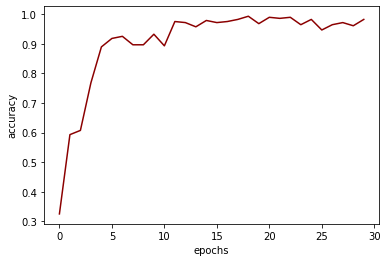

In [140]:
val_loss = result.history['loss']
val_acc = result.history['acc']

plt.plot(val_acc, label='acc', color='darkred')
plt.xlabel('epochs')
plt.ylabel('accuracy')
#ax_acc.grid(linestyle='--', color='lavender')

plt.show()

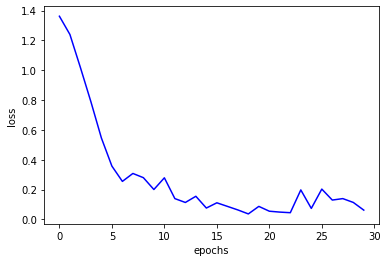

In [142]:
plt.plot(val_loss, label='loss', color='blue')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()